In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,f1_score

import warnings
warnings.filterwarnings('ignore')



In [2]:
#displaying the csv file
a=pd.read_csv("depressed.csv")
a

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [3]:
# showing the 1st 10 raws
a.head(10)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
5,483,25,1,35,1,6,10,8,35937466,736707,...,0,1,0,1,22688441,18907036,0,4442561,76629095.0,0
6,849,130,0,34,0,1,9,3,41303144,21925041,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
7,1386,72,1,21,1,2,10,4,12013633,20323505,...,0,0,1,0,9275569,36979933,0,33922659,54600174.0,0
8,930,195,1,32,1,7,9,9,11087568,25224208,...,1,0,0,0,32564587,28738691,1,14018381,15117619.0,0
9,390,33,1,29,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [13]:
# showing the last 10 raws
a.tail(10)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1419,81,7,1,30,1,1,14,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1420,707,52,1,20,1,2,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1421,1317,188,1,20,1,2,10,4,36531058,11210759,...,0,1,0,1,39771502,3942428,0,41031378,50755151.0,0
1422,462,27,1,35,1,6,6,8,21764888,22861940,...,0,1,0,0,13346142,11121784,0,2314812,15926396.0,0
1423,109,15,1,25,1,3,9,5,24343362,16928246,...,0,1,0,0,13346142,53384566,0,86900793,17556848.0,0
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1428,231,12,1,33,0,4,8,5,81678391,22861940,...,0,1,0,1,20019212,16682677,0,69642126,13012488.0,0


In [14]:
#info of the dataframe
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [ ]:
# describing the dataset
a.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


In [6]:
#checking the shape of the file
a.shape

(1429, 23)

In [7]:
#null valuse
a.isnull()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1425,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1426,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1427,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# checking the totall null values
a.isna().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [9]:
#filling the null values in no_lasting_investmen with 0
o=a.fillna(0)
o

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [15]:
#checking null values in the new file
o.isna().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

In [11]:
# to specifydepressed column
a["depressed"]

0       0
1       1
2       0
3       0
4       0
       ..
1424    0
1425    0
1426    1
1427    0
1428    0
Name: depressed, Length: 1429, dtype: int64

In [12]:
#  diplaying depressed only(1)
depressed_only = o[o["depressed"] == 1]
depressed_only


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
6,849,130,0,34,0,1,9,3,41303144,21925041,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
10,540,52,1,84,0,0,1,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
14,603,100,1,56,1,0,12,2,93596368,21140288,...,0,1,0,0,43775349,77808008,0,12402556,71201668.0,1
20,1001,207,1,40,0,0,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1062,214,1,28,1,4,12,6,30108896,22861940,...,0,0,0,1,53384566,51960976,0,50556335,54349934.0,1
1396,28,3,1,49,1,2,5,4,12652142,22861940,...,0,1,0,0,27359591,29406002,0,16757162,40883684.0,1
1407,201,12,1,59,0,0,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1415,1408,93,1,34,1,3,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1


In [ ]:
# number of depressed people
o["depressed"].value_counts()

depressed
0    1191
1     238
Name: count, dtype: int64

In [ ]:
#  diplaying depressed only(1)
depressed_only = o[o["depressed"] == 1]
depressed_only

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
6,849,130,0,34,0,1,9,3,41303144,21925041,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
10,540,52,1,84,0,0,1,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
14,603,100,1,56,1,0,12,2,93596368,21140288,...,0,1,0,0,43775349,77808008,0,12402556,71201668.0,1
20,1001,207,1,40,0,0,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1062,214,1,28,1,4,12,6,30108896,22861940,...,0,0,0,1,53384566,51960976,0,50556335,54349934.0,1
1396,28,3,1,49,1,2,5,4,12652142,22861940,...,0,1,0,0,27359591,29406002,0,16757162,40883684.0,1
1407,201,12,1,59,0,0,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1415,1408,93,1,34,1,3,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1


In [ ]:
# to make age as the index
depressed_only.set_index("Age")


,Survey_id,Ville_id,sex,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
Age,,,,,,,,,,,,,,,,,,,,,
23,747,57,1,1,3,8,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
34,849,130,0,0,1,9,3,41303144,21925041,23399979,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
84,540,52,1,0,0,1,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
56,603,100,1,1,0,12,2,93596368,21140288,5925687,...,0,1,0,0,43775349,77808008,0,12402556,71201668.0,1
40,1001,207,1,0,0,7,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,1062,214,1,1,4,12,6,30108896,22861940,14635457,...,0,0,0,1,53384566,51960976,0,50556335,54349934.0,1
49,28,3,1,1,2,5,4,12652142,22861940,1915728,...,0,1,0,0,27359591,29406002,0,16757162,40883684.0,1
59,201,12,1,0,0,7,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1


In [ ]:
depressed_only.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
6,849,130,0,34,0,1,9,3,41303144,21925041,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
10,540,52,1,84,0,0,1,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
14,603,100,1,56,1,0,12,2,93596368,21140288,...,0,1,0,0,43775349,77808008,0,12402556,71201668.0,1
20,1001,207,1,40,0,0,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1


In [ ]:
depressed_only.drop("depressed",axis=1)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,other_expenses,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen
1,747,57,1,23,1,3,8,5,28912201,22861940,...,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
6,849,130,0,34,0,1,9,3,41303144,21925041,...,10890451,0,0,0,0,26692283,22243569,0,22562288,55608922.0
10,540,52,1,84,0,0,1,5,28912201,22861940,...,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
14,603,100,1,56,1,0,12,2,93596368,21140288,...,72469551,0,1,0,0,43775349,77808008,0,12402556,71201668.0
20,1001,207,1,40,0,0,7,5,28912201,22861940,...,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1062,214,1,28,1,4,12,6,30108896,22861940,...,40278656,0,0,0,1,53384566,51960976,0,50556335,54349934.0
1396,28,3,1,49,1,2,5,4,12652142,22861940,...,21524658,0,1,0,0,27359591,29406002,0,16757162,40883684.0
1407,201,12,1,59,0,0,7,5,28912201,22861940,...,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0
1415,1408,93,1,34,1,3,10,5,28912201,22861940,...,28203066,0,0,0,0,30028818,31363432,0,28411718,28292707.0


In [ ]:
depressed_only.index

Index([   1,    6,   10,   14,   20,   21,   23,   24,   39,   42,
       ...
       1349, 1356, 1367, 1372, 1383, 1387, 1396, 1407, 1415, 1426],
      dtype='int64', length=238)

<Axes: >

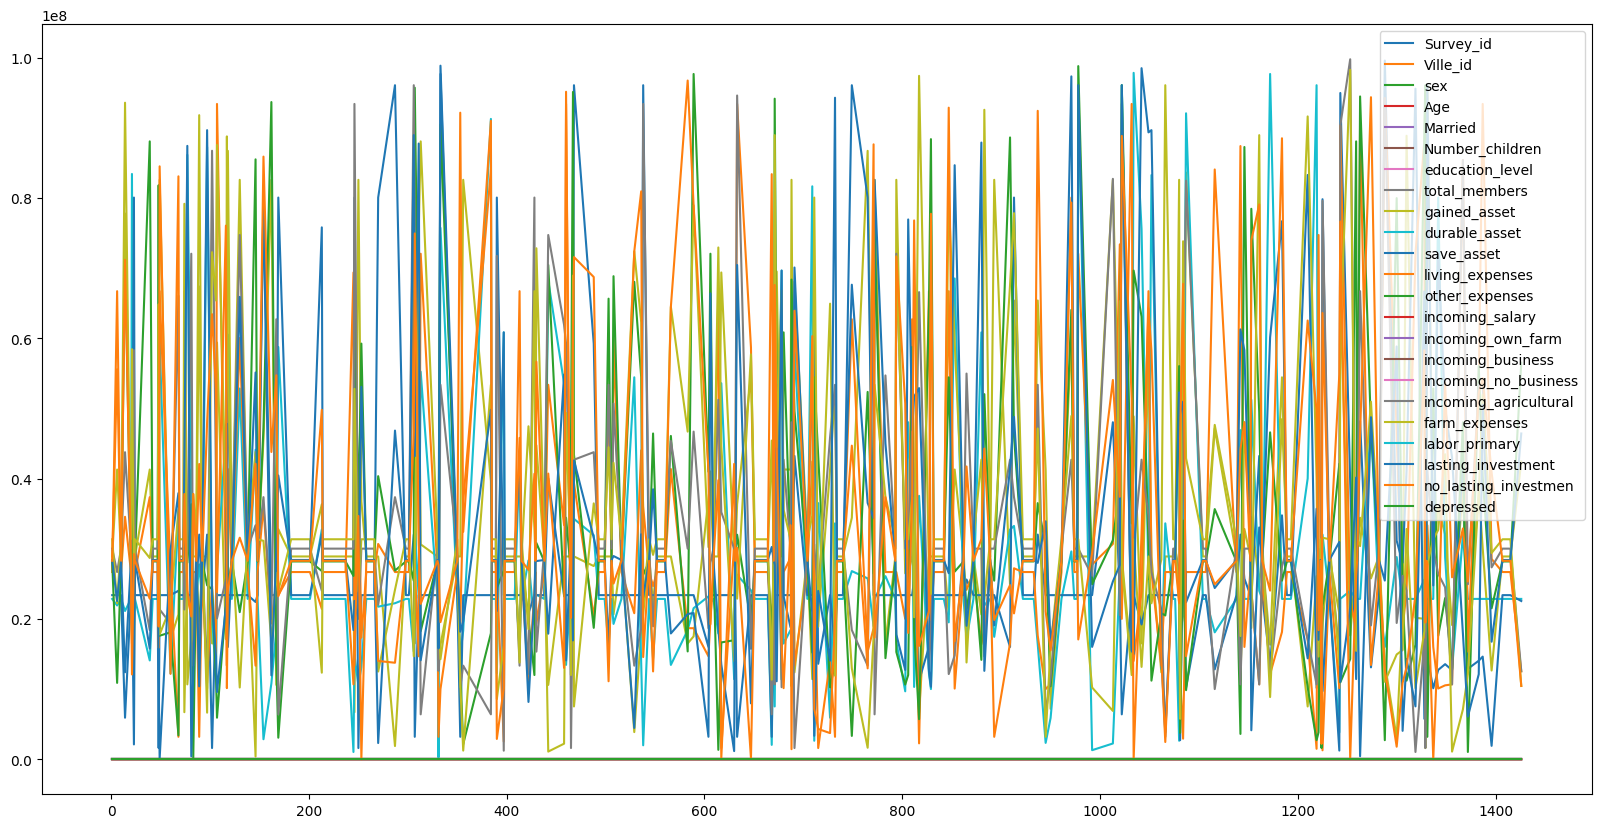

In [ ]:
#ploting the total graph
depressed_only.plot(figsize=(20,10))

<Axes: >

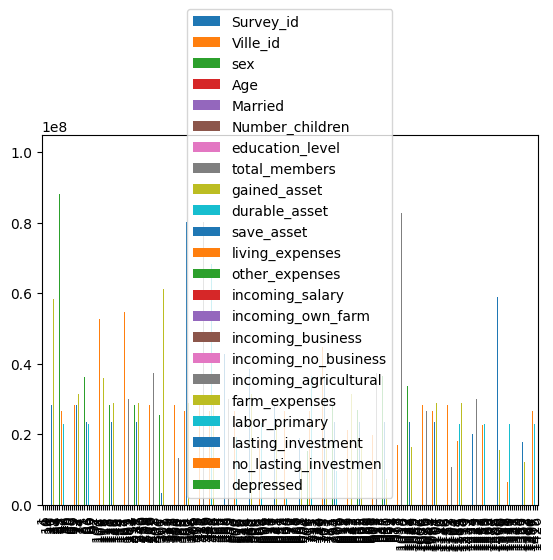

In [ ]:
#plotting a bar graph
depressed_only.plot(kind="bar")

In [26]:
print(o.corr())

                       Survey_id  Ville_id       sex       Age   Married  \
Survey_id               1.000000  0.662523  0.025015  0.021877 -0.011441   
Ville_id                0.662523  1.000000  0.010970 -0.012279  0.026970   
sex                     0.025015  0.010970  1.000000 -0.159376  0.282472   
Age                     0.021877 -0.012279 -0.159376  1.000000 -0.396944   
Married                -0.011441  0.026970  0.282472 -0.396944  1.000000   
Number_children         0.020242  0.030428  0.214297 -0.138448  0.227206   
education_level        -0.037984 -0.010412 -0.072137 -0.377146  0.218406   
total_members           0.003653  0.007225  0.180664 -0.073936  0.246808   
gained_asset            0.018949 -0.014400  0.022316  0.008316 -0.015317   
durable_asset          -0.020738 -0.026135  0.028602  0.045368 -0.045356   
save_asset             -0.014632 -0.020477  0.006637 -0.026685  0.009164   
living_expenses         0.012638 -0.027240 -0.003493 -0.036599  0.024518   
other_expens

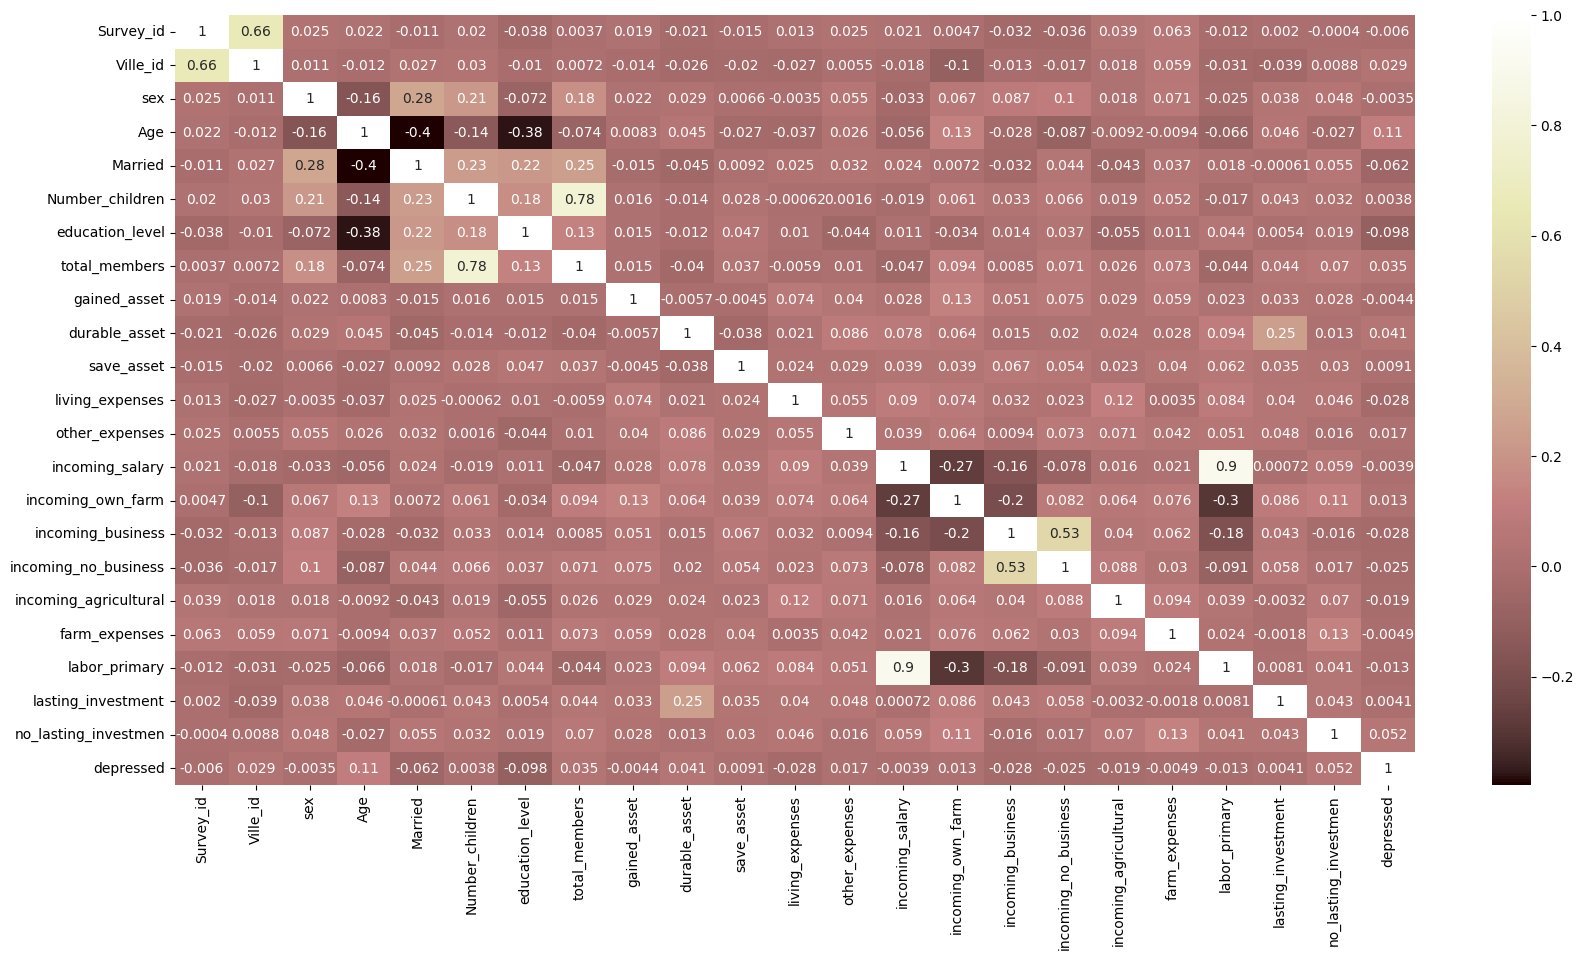

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(o.corr(),cmap='pink',annot=True)
plt.show()

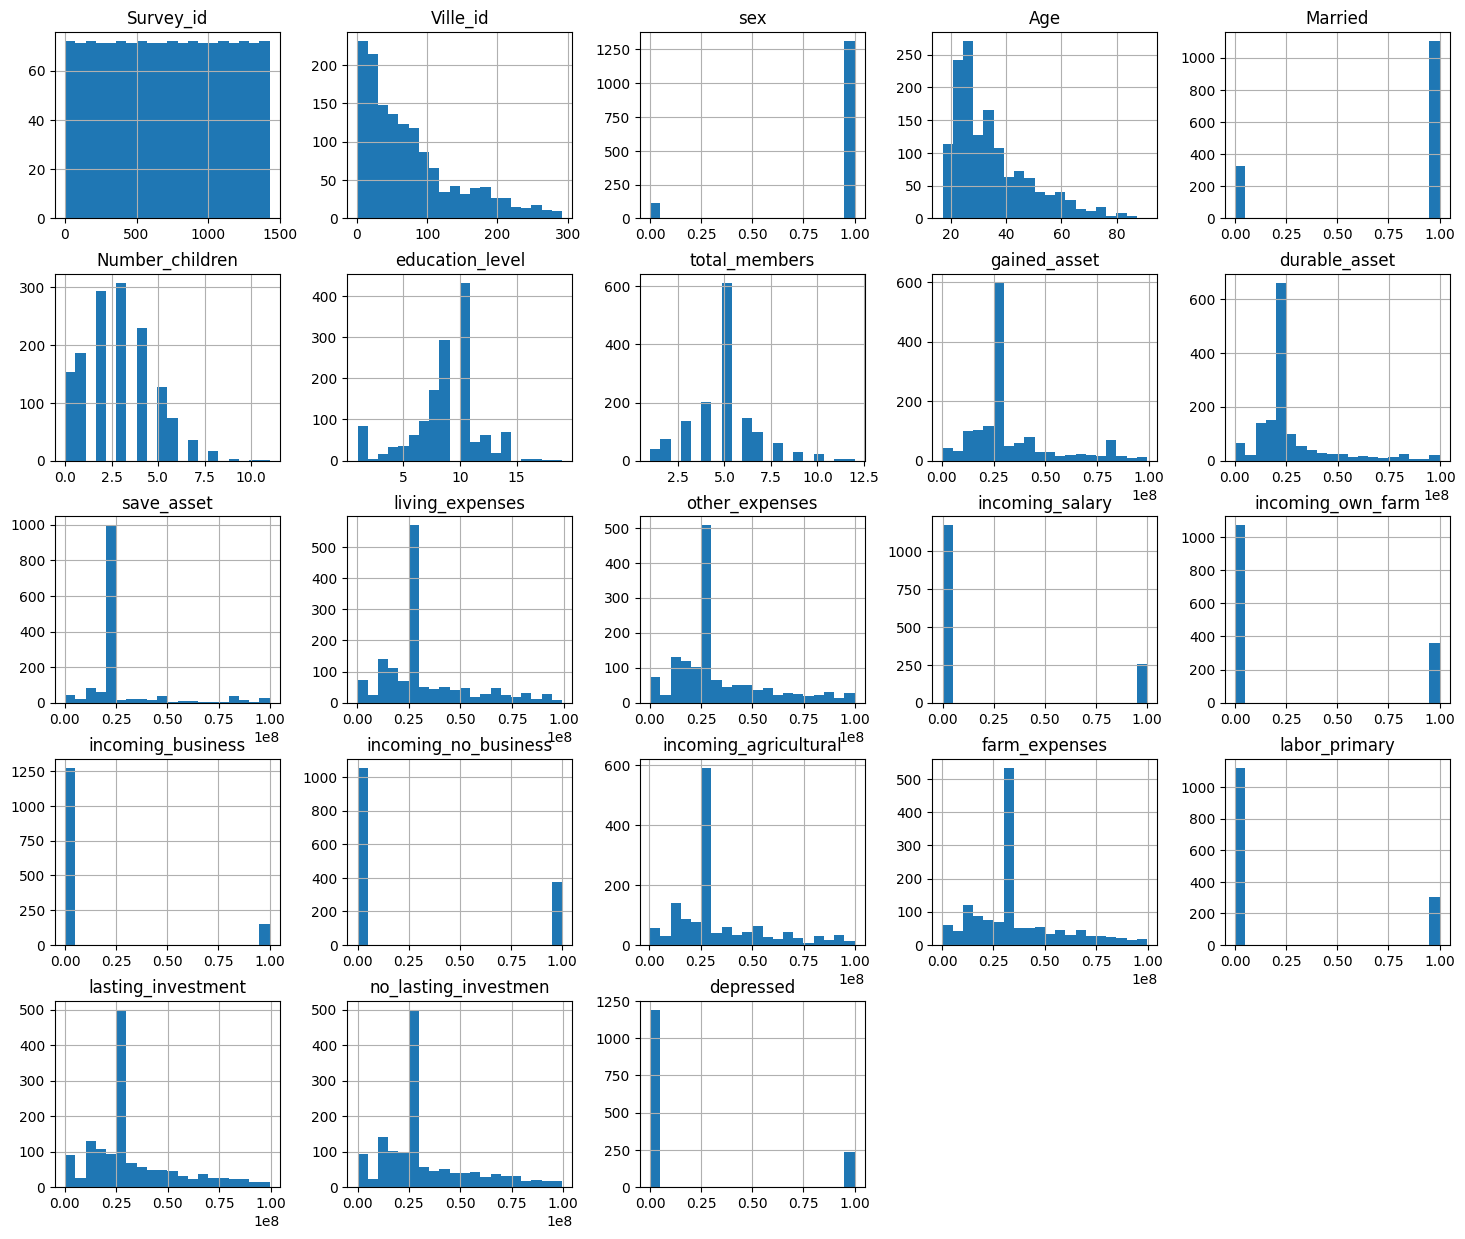

In [33]:
o.hist(bins=20, figsize=(18,15))
plt.show()

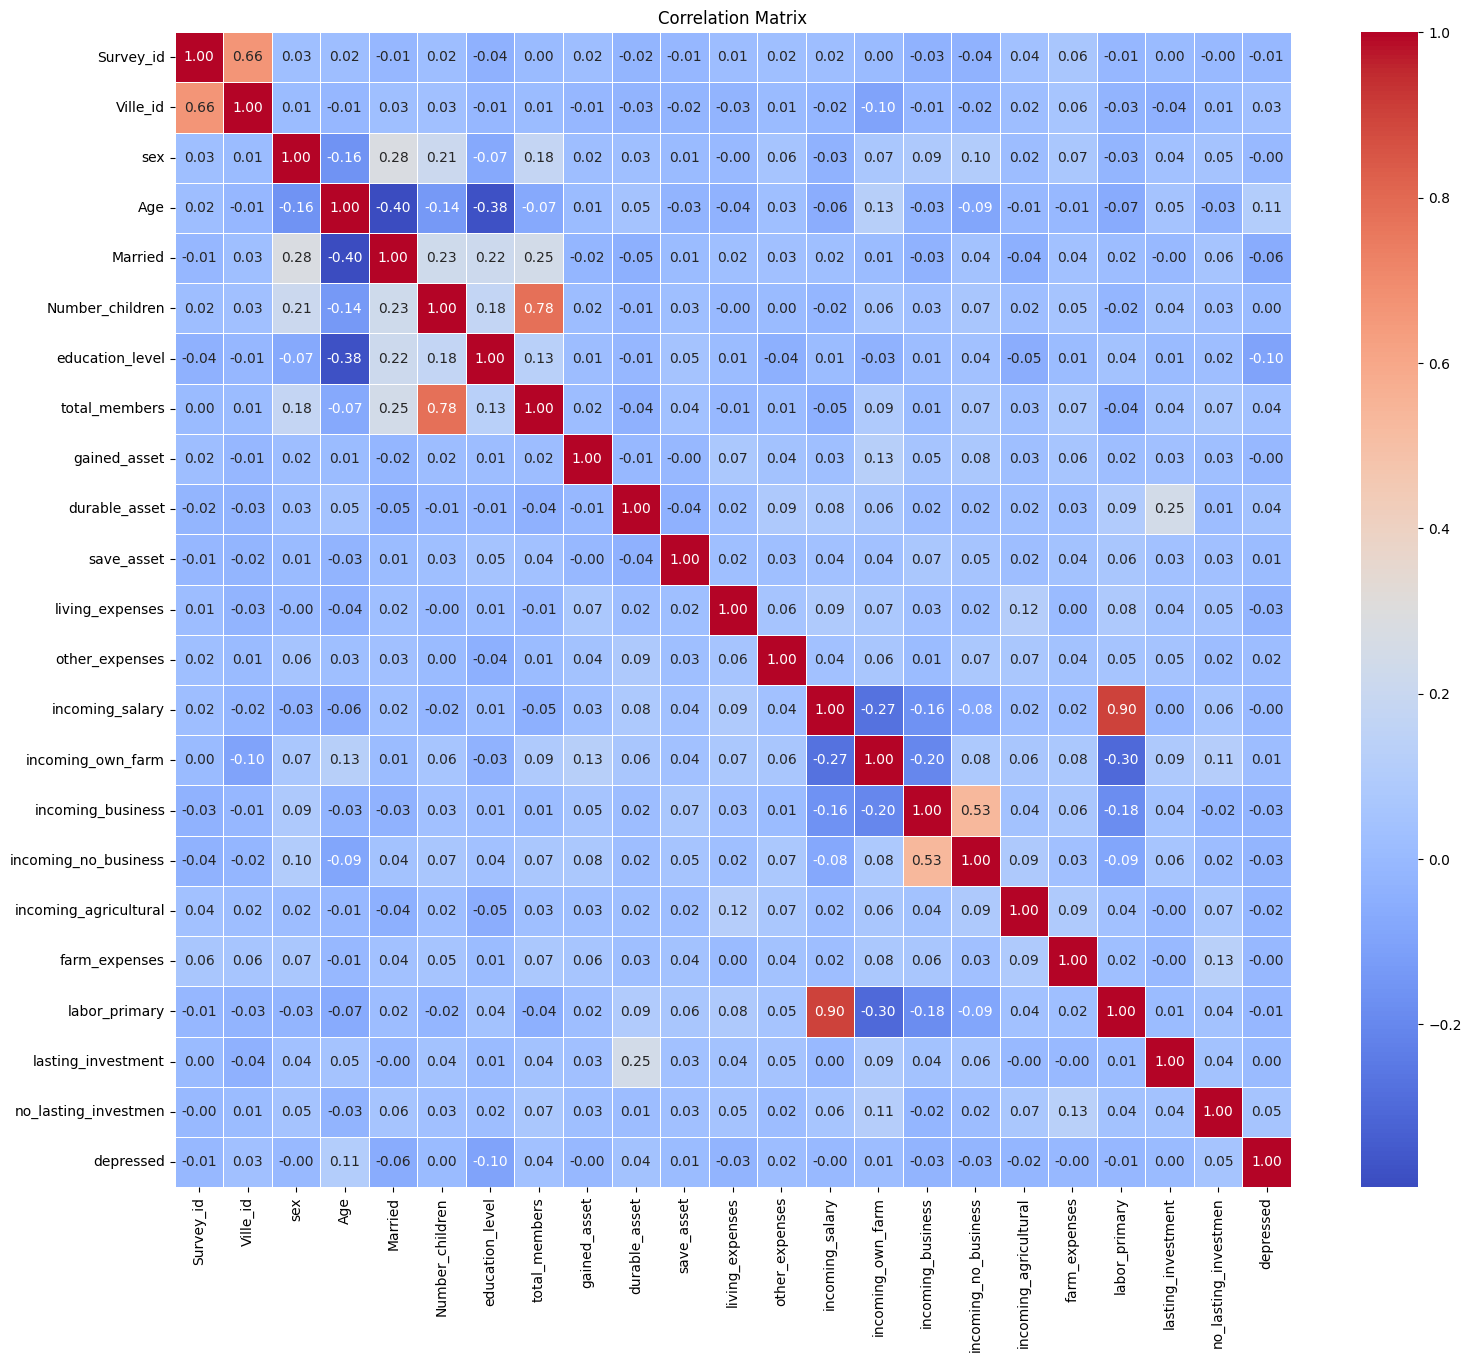

In [36]:
label_encoder = LabelEncoder()
o['Age'] = label_encoder.fit_transform(o['Age'])
o['depressed'] = label_encoder.fit_transform(o['depressed'])

correlation_matrix = o.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [38]:
x=o[['Age']].values
y=o['depressed'].values

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [51]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
model=regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regressor = LinearRegression()
model=regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

# Evaluate regression performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.1308298093394944
R-squared: 0.013245266506843656
